In [16]:
import numpy as np
import skimage.io as io
import astropy.io.fits as fits
import matplotlib.pyplot as plt

# Some functions

## Load a stack of fits images using a file mask

In [43]:
def loadStack(mask, first, last) :
    img = np.array([1.0])
    for idx in np.arange(first,last+1) :
        fname=mask.format(idx)
        hdul = fits.open(fname)
        tmp = hdul[0].data.astype(float)
        
        if (idx==first):
            img.resize(tmp.shape[0],tmp.shape[1],last-first+1)
            
        img[:,:,idx-first]=tmp
        
    return img

## Load and normalize projections

In [ ]:
def normalize(inMask, inFirst, inLast, obMask, obFirst, obLast, dcMask, dcFirst, dcLast, doseROI=[]):
    ob = loadStack(obMask,obFirst,obLast).mean(2)
    dc = loadStack(dcMask,dcFirst,dcLast).mean(2)
    img = loadStack(inMask,inFirst,inLast)
    
    for idx in np.arange(0,img.shape[2]) :
        img[:,:,idx]= (img[:,:,idx]-dc)/(ob-dc)
        
        
    return img
    

# Examples

Load a stack. Note that the {:04} is used as mask for zero padded index in the filenames, e.g. file_0001.fits would be accessed by the mask file_{:04}.fits

In [45]:
img=loadStack('/Users/data/P08062_wood/raw_CCD/ob_{:04}.fits',1,5)

Normalize a series of projections

In [53]:
img=normalize('/Users/data/P08062_wood/raw_CCD/wood_{:04}.fits',1,12,
              '/Users/data/P08062_wood/raw_CCD/ob_{:04}.fits',1,5,
              '/Users/data/P08062_wood/raw_CCD/dark_{:04}.fits',1,5)

Show the loaded results

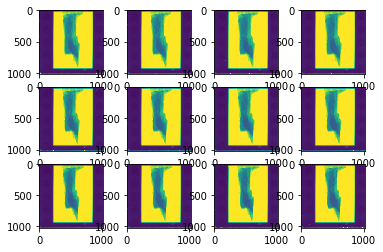

In [54]:
for idx in np.arange(0,img.shape[2]) :
    plt.subplot(3,4,idx+1)
    plt.imshow(img[:,:,idx],vmax=1, vmin=0)